In [1]:
# Uncomment the following lines if you are using Windows!
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark.sql.functions import abs as abs_col
from pyspark.sql.functions import *

from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

appName = "Big Data Analytics"
master = "local"

# Create Configuration object for Spark.
conf = pyspark.SparkConf()\
    .set('spark.driver.host','127.0.0.1')\
    .setAppName(appName)\
    .setMaster(master)

# Create Spark Context with the new configurations rather than relying on the default one
sc = SparkContext.getOrCreate(conf=conf)

spark = (
    SparkSession.builder
    .appName("Big Data Analytics")
    .master("local")
    .config("spark.driver.host", '127.0.0.1')
    .getOrCreate()
)

## Two options here, you can either read from Postgres Database or from CSV file

In [2]:
# # Ingest data into Postgres
# db_properties={}
# #update your db username
# db_properties['username']="postgres"
# #update your db passwor
# db_properties['password']= "1234"
# #make sure you got the right port number here
# db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
# #make sure you had the Postgres JAR file in the right location
# db_properties['driver']="org.postgresql.Driver"
# db_properties['table']= "fifa.players"

In [3]:
# df_read = spark.read.format("jdbc")\
#     .option("url", db_properties['url'])\
#     .option("dbtable", db_properties['table'])\
#     .option("user", db_properties['username'])\
#     .option("password", db_properties['password'])\
#     .option("Driver", db_properties['driver'])\
#     .load()

df_read = spark.read.csv("data/merged_raw.csv", header=True, inferSchema=True)

df_read.show(10)

+---------+--------------------+-----------------+--------------------+----------------+-------+---------+---------+--------+---+----------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-----------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-

In [4]:
df_read.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: date (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: double (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: double (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: date (nullable = true)
 |-- club_contract_valid_until: double (nullable = true)
 |-- nationality_id: integer (nullable = true)
 |--

## Drop Unused Columns

In [5]:
columns_to_drop = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'UID', 'Year'] # Identifiers and URLs
columns_to_drop = columns_to_drop + ['club_team_id', 'club_name', 'league_name', 'nationality_id', 'nationality_name', 'nation_team_id'] # Club and nation names
columns_to_drop = columns_to_drop + ['dob', 'club_joined', 'club_contract_valid_until', 'club_loaned_from'] # Personal Details
columns_to_drop = columns_to_drop + ['club_position', 'club_jersey_number', 'nation_position', 'nation_jersey_number', 'player_positions'] # Positional Details
columns_to_drop = columns_to_drop + ['real_face', 'player_tags', 'player_traits'] # Aesthetic Details
columns_to_drop = columns_to_drop + ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'] # Derived Positional Details
df_dropped_unused= df_read.drop(*columns_to_drop)

In [6]:
df_dropped_unused.printSchema()

root
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- league_level: double (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- work_rate: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- release_clause_eur: integer (nullable = true)
 |-- pace: double (nullable = true)
 |-- shooting: double (nullable = true)
 |-- passing: double (nullable = true)
 |-- dribbling: double (nullable = true)
 |-- defending: double (nullable = true)
 |-- physic: double (nullable = true)
 |-- attacking_crossing: integer (nullable = true)
 |-- attacking_finishing: integer (nullable = true)
 |-- att

In [7]:
df_dropped_v2 = df_dropped_unused.drop(*['potential', 'value_eur', 'wage_eur'])

In [8]:
df_dropped_v2.show(10)

+-------+---+---------+---------+------------+--------------+---------+-----------+------------------------+-------------+----------------+------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-----------------+
|overall|age|height_cm|weight_kg|league_level|preferred_foot|weak_foot|skill_moves|international_rep

# Remove Null values

In [9]:

from pyspark.sql.functions import count, col, when
null_count = df_dropped_v2.select([count(when(col(c).isNull(), c)).alias(c) for c in df_dropped_v2.columns]).toPandas()
print(null_count.to_string())
drop_columns = null_count.columns[null_count.iloc[0] > (0.2 * df_dropped_v2.count())]
print(drop_columns)
# After looking at the null count, we figured there are five traits that Goal keepers do not have so we will have to do data imputation for that. 
# For columns like release_clause_eur, mentality composure and goalkeeping_speed, they have too many null counts so we will simply drop them.
df_dropped_null = df_dropped_v2.drop(*drop_columns)


   overall  age  height_cm  weight_kg  league_level  preferred_foot  weak_foot  skill_moves  international_reputation  work_rate  body_type  release_clause_eur   pace  shooting  passing  dribbling  defending  physic  attacking_crossing  attacking_finishing  attacking_heading_accuracy  attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  movement_acceleration  movement_sprint_speed  movement_agility  movement_reactions  movement_balance  power_shot_power  power_jumping  power_stamina  power_strength  power_long_shots  mentality_aggression  mentality_interceptions  mentality_positioning  mentality_vision  mentality_penalties  mentality_composure  defending_marking_awareness  defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed
0        0    0          0          0          2015      

In [10]:
df_dropped_null.summary().show()

+-------+-----------------+------------------+------------------+------------------+------------------+--------------+------------------+-----------------+------------------------+-------------+-----------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-------------------+--------------------------+-----------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------------+---------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+-----------------------+---------------------+------------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+-----------------

In [11]:
# now we dropna of those columns that only have a small amount of null values
df_dropped_na = df_dropped_null.dropna(subset = ['league_level'])

## Data Imputation

In [12]:
# Create a column to indicate whether the player is a goal keeper or not
df_dropped_na = df_dropped_na.withColumn('is_gk', when(df_dropped_na['passing'].isNull(), 1).otherwise(0))


In [13]:
# find the mean value for imputation needs
# Imputation for goalkeeper based on mean value
imputation_col = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Make sure df_dropped_na is assigned a valid DataFrame before performing operations
df_clone = df_dropped_na
for col in imputation_col:
    df_clone = df_clone.na.fill(0, subset=[col])


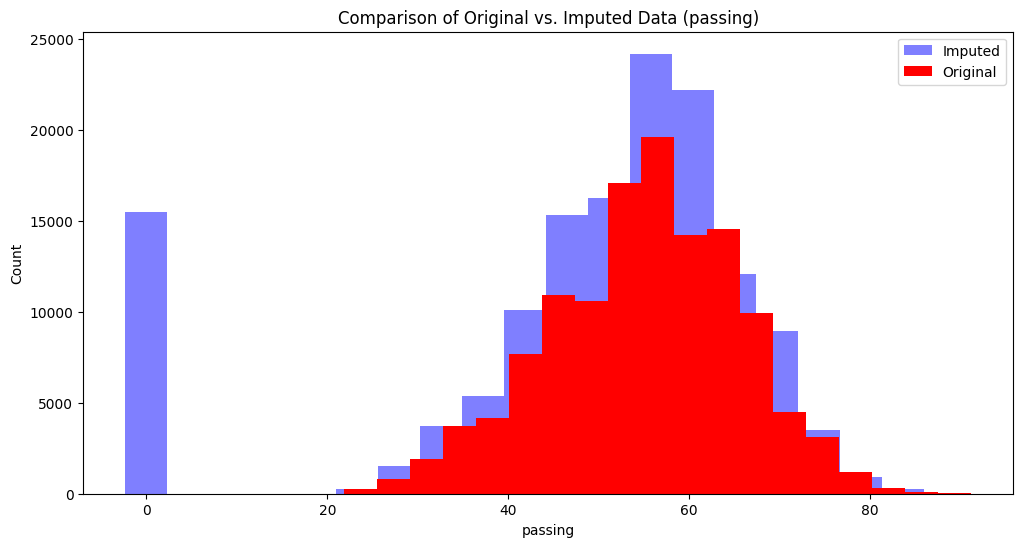

In [14]:
# Compute histogram for the original dataset
col = 'passing'
histogram_original = df_dropped_na.select(col).rdd.flatMap(lambda x: x).histogram(20)
bin_edges_original = histogram_original[0]
bin_counts_original = histogram_original[1]

# Compute histogram for the imputed dataset
histogram_imputed = df_clone.select(col).rdd.flatMap(lambda x: x).histogram(20)
bin_edges_imputed = histogram_imputed[0]
bin_counts_imputed = histogram_imputed[1]

import matplotlib.pyplot as plt
import numpy as np

# Plotting both histograms for comparison
plt.figure(figsize=(12, 6))
# Histogram for imputed data
plt.bar(bin_edges_imputed[:-1], bin_counts_imputed, width=np.diff(bin_edges_imputed), color='blue', alpha=0.5, label='Imputed')
# Histogram for original data
plt.bar(bin_edges_original[:-1], bin_counts_original, width=np.diff(bin_edges_original), color='red', alpha=1, label='Original')


plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.title(f'Comparison of Original vs. Imputed Data ({col})')
plt.legend()
plt.show()


In [15]:
df_clone.show()

+-------+---+---------+---------+------------+--------------+---------+-----------+------------------------+-------------+----------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-----+
|overall|age|height_cm|weight_kg|league_level|preferred_foot|weak_foot|skill_moves|international_reputation|    work_rate|       body_type|pace|shootin

In [16]:
df_clone.printSchema()

root
 |-- overall: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- league_level: double (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- work_rate: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- pace: double (nullable = false)
 |-- shooting: double (nullable = false)
 |-- passing: double (nullable = false)
 |-- dribbling: double (nullable = false)
 |-- defending: double (nullable = false)
 |-- physic: double (nullable = false)
 |-- attacking_crossing: integer (nullable = true)
 |-- attacking_finishing: integer (nullable = true)
 |-- attacking_heading_accuracy: integer (nullable = true)
 |-- attacking_short_passing: integer (nullable = true)
 |-- attacking_volleys: integer (nullable = true)
 |-- skill_

# One-hot encoding

In [17]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

string_cols = ['preferred_foot','work_rate', 'body_type']
for col in string_cols:
    print(df_clone.select(col).distinct().show())

indexers = [StringIndexer(inputCol=column, outputCol=column + "_index") for column in string_cols]
encoders = [OneHotEncoder(inputCol=column + "_index", outputCol=column + "_vec") for column in string_cols]

pipeline = Pipeline(stages=indexers + encoders)

df_transformed = pipeline.fit(df_clone).transform(df_clone)

+--------------+
|preferred_foot|
+--------------+
|          Left|
|         Right|
+--------------+

None
+-------------+
|    work_rate|
+-------------+
|Medium/Medium|
|  High/Medium|
|     Low/High|
|      Low/Low|
|    High/High|
|   Medium/Low|
|     High/Low|
|  Medium/High|
|   Low/Medium|
+-------------+

None
+----------------+
|       body_type|
+----------------+
|   Stocky (170-)|
|   Normal (185+)|
|     Lean (185+)|
|Normal (170-185)|
|     Lean (170-)|
|  Lean (170-185)|
|   Normal (170-)|
|   Stocky (185+)|
|Stocky (170-185)|
|          Unique|
+----------------+

None


In [18]:
df_transformed.select([c + "_index" for c in string_cols] + [c + "_vec" for c in string_cols]).show()

+--------------------+---------------+---------------+------------------+-------------+-------------+
|preferred_foot_index|work_rate_index|body_type_index|preferred_foot_vec|work_rate_vec|body_type_vec|
+--------------------+---------------+---------------+------------------+-------------+-------------+
|                 1.0|            3.0|            4.0|         (1,[],[])|(8,[3],[1.0])|(9,[4],[1.0])|
|                 0.0|            5.0|            2.0|     (1,[0],[1.0])|(8,[5],[1.0])|(9,[2],[1.0])|
|                 1.0|            5.0|            0.0|         (1,[],[])|(8,[5],[1.0])|(9,[0],[1.0])|
|                 0.0|            3.0|            2.0|     (1,[0],[1.0])|(8,[3],[1.0])|(9,[2],[1.0])|
|                 0.0|            0.0|            2.0|     (1,[0],[1.0])|(8,[0],[1.0])|(9,[2],[1.0])|
|                 0.0|            1.0|            4.0|     (1,[0],[1.0])|(8,[1],[1.0])|(9,[4],[1.0])|
|                 0.0|            1.0|            0.0|     (1,[0],[1.0])|(8,[1],[1

In [19]:
df_transformed.show(10)

+-------+---+---------+---------+------------+--------------+---------+-----------+------------------------+-------------+----------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------+---------------------+----------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-----+--------------------+---------------+---------------+------------------+-------------+-------------+
|overall|age|height_cm|weight_kg|league_level|prefe

## Correlation Analysis

In [20]:
# Before we vectorize the features, we will perform a correlation analysis to see if there are any features that are highly correlated with each other
from pyspark.sql.functions import col, corr
import pandas as pd


numeric_features = df_transformed.drop('preferred_foot', 'overall', 'work_rate', 'body_type', 'preferred_foot_index', 'work_rate_index', 'body_type_index', 'preferred_foot_vec', 'work_rate_vec', 'body_type_vec').columns
# Calculate correlation of each feature with the target variable
feature_correlation_with_target = {col: df_transformed.stat.corr(col, "overall") for col in numeric_features}

In [21]:
# Filter features based on a threshold

selected_features = []
for col, corr_value in feature_correlation_with_target.items():
    if __builtins__.abs(corr_value) > 0.4:
        selected_features.append(col)

print(f"Number of features selected: {len(selected_features)}")
print(f"Selected features: {selected_features}")
# Place holder for selected features
corr_matrix = pd.DataFrame(columns=selected_features, index=selected_features)

for col1 in selected_features:
    for col2 in selected_features:
        corr_value = df_transformed.select(corr(col1, col2)).collect()[0][0]
        corr_matrix.loc[col1, col2] = corr_value

corr_matrix

Number of features selected: 11
Selected features: ['age', 'international_reputation', 'attacking_short_passing', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power', 'power_long_shots', 'mentality_aggression', 'mentality_vision']


,age,international_reputation,attacking_short_passing,skill_curve,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,power_long_shots,mentality_aggression,mentality_vision
age,1.0,0.255602,0.136708,0.142032,0.183638,0.087,0.451234,0.19288,0.153748,0.261427,0.187766
international_reputation,0.255602,1.0,0.240025,0.226314,0.236312,0.213277,0.4383,0.242083,0.209403,0.173611,0.269578
attacking_short_passing,0.136708,0.240025,1.0,0.768978,0.896636,0.908117,0.477855,0.695244,0.752658,0.609875,0.733166
skill_curve,0.142032,0.226314,0.768978,1.0,0.705733,0.825302,0.40958,0.732362,0.828294,0.394641,0.749628
skill_long_passing,0.183638,0.236312,0.896636,0.705733,1.0,0.787353,0.45861,0.615204,0.662714,0.589012,0.707097
skill_ball_control,0.087,0.213277,0.908117,0.825302,0.787353,1.0,0.43784,0.745968,0.827498,0.550293,0.735817
movement_reactions,0.451234,0.4383,0.477855,0.40958,0.45861,0.43784,1.0,0.438934,0.416618,0.406943,0.489387
power_shot_power,0.19288,0.242083,0.695244,0.732362,0.615204,0.745968,0.438934,1.0,0.83603,0.421163,0.68441
power_long_shots,0.153748,0.209403,0.752658,0.828294,0.662714,0.827498,0.416618,0.83603,1.0,0.385479,0.754798
mentality_aggression,0.261427,0.173611,0.609875,0.394641,0.589012,0.550293,0.406943,0.421163,0.385479,1.0,0.319292


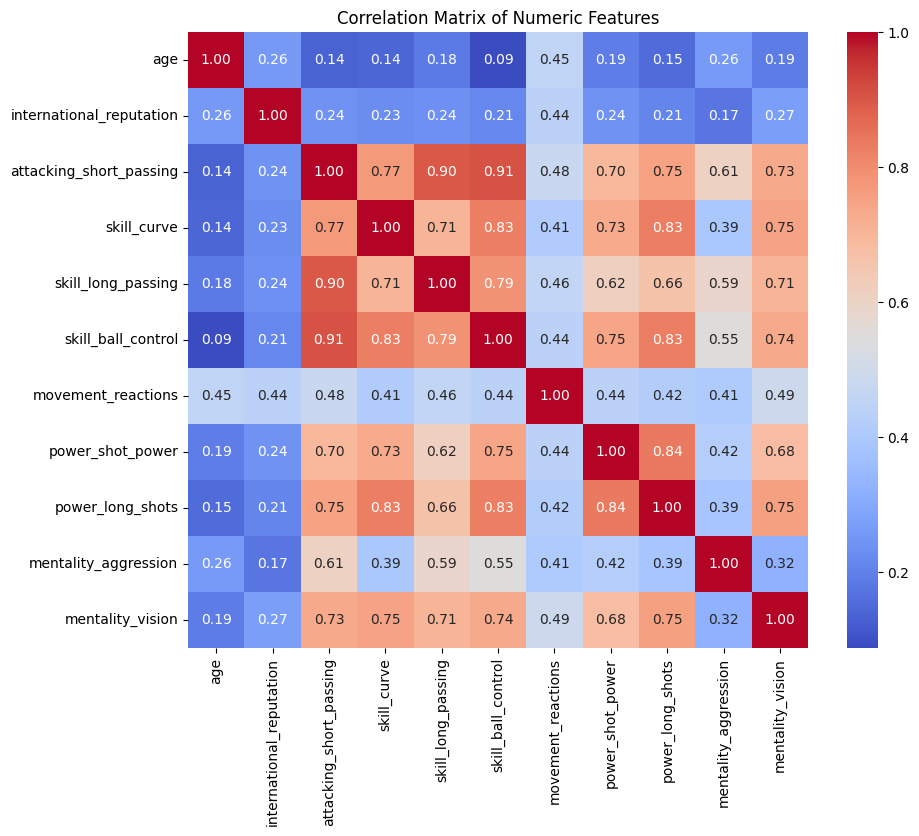

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = corr_matrix.astype(float)
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [23]:
# Set a high correlation threshold
high_corr_threshold = 0.8

# Identify groups of highly correlated features
correlated_groups = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and (__builtins__.abs(corr_matrix.loc[col1, col2]) > high_corr_threshold):
            # Check if the pair is already in any of the groups
            already_grouped = any([col1 in group or col2 in group for group in correlated_groups])
            if not already_grouped:
                # Add the new group
                correlated_groups.append({col1, col2})

print(f"Correlated groups: {correlated_groups}")

# We will keep one of the columns in each group
strongest_corr_with_target = 0
strongest_corr_col = ''
keep_col = []
for group in correlated_groups:
    for col in group:
        if __builtins__.abs(feature_correlation_with_target[col]) > strongest_corr_with_target:
            strongest_corr_with_target = __builtins__.abs(feature_correlation_with_target[col])
            strongest_corr_col = col
    keep_col.append(strongest_corr_col)
    strongest_corr_with_target = 0
print(f"Selected columns: {keep_col}")

dropped_cols = []
for group in correlated_groups:
    for col in group:
        if col not in keep_col:
            dropped_cols.append(col)
print(f"Dropped columns: {dropped_cols}")

df_corr_analyzed = df_transformed.drop(*dropped_cols)
print(df_transformed.columns)

Correlated groups: [{'skill_long_passing', 'attacking_short_passing'}, {'skill_curve', 'skill_ball_control'}, {'power_shot_power', 'power_long_shots'}]
Selected columns: ['attacking_short_passing', 'skill_ball_control', 'power_shot_power']
Dropped columns: ['skill_long_passing', 'skill_curve', 'power_long_shots']
['overall', 'age', 'height_cm', 'weight_kg', 'league_level', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mental

## Detect Outliers

In [24]:
df_corr_analyzed.show(5)

+-------+---+---------+---------+------------+--------------+---------+-----------+------------------------+-------------+----------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+--------------------+-----------------------+---------------------+----------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-----+--------------------+---------------+---------------+------------------+-------------+-------------+
|overall|age|height_cm|weight_kg|league_level|preferred_foot|weak_foot|skill_moves|international_re

In [25]:
from pyspark.sql import functions as F
from functools import reduce

def find_outliers(df):
    # Assuming df.columns are all numeric. If not, filter non-numeric columns first.
    numeric_columns = df.columns

    print("Starting outlier detection...")
    outlier_flags = []

    for col in numeric_columns:
        print(f"Processing column: {col}")
        Q1, Q3 = df.approxQuantile(col, [0.25, 0.75], relativeError=0)
        IQR = Q3 - Q1

        less_Q1 = Q1 - 1.5 * IQR
        more_Q3 = Q3 + 1.5 * IQR

        outlier_flag = F.when((F.col(col) < less_Q1) | (F.col(col) > more_Q3), 1).otherwise(0)
        outlier_flags.append(outlier_flag.alias(f'is_outlier_{col}'))

    print("Aggregating outlier conditions...")
    df = df.select("*", *outlier_flags)

    print("Calculating total outliers...")
    total_outliers_expr = '+'.join([f'is_outlier_{col}' for col in numeric_columns])
    df = df.withColumn('total_outliers', F.expr(total_outliers_expr))

    # Optionally, drop the individual outlier columns if they are not needed
    df = df.drop(*[f'is_outlier_{col}' for col in numeric_columns])

    return df

In [26]:
# Finding outliers in the dataset
# We start with filtering out non-numeric columns in the dataset
numeric_columns = [column[0] for column in df_corr_analyzed.dtypes if column[1]in ('int', 'double')]
col_to_drop = ['overall', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation',  'preferred_foot_index', 'work_rate_index', 'body_type_index', 'is_gk']
numeric_columns = [col for col in numeric_columns if col not in col_to_drop]
print(f"Numeric columns: {numeric_columns}")

# Since conducting outlier detection on the entire dataset is computationally expensive, we will choose some of the highly correlated features to conduct outlier detection
high_correlated_cols = [col for col in numeric_columns if feature_correlation_with_target[col] > 0.4]
print(f"Highly correlated columns: {high_correlated_cols}")

df_outliers = find_outliers(df_corr_analyzed.select(high_correlated_cols))
df_outliers.groupby("total_outliers").count().show()


Numeric columns: ['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
Highly correlated columns: ['age', 'attacking_short_passing', 'skill_ball_control', 'movement_reactions', 'power_shot_power', 'mentality_aggression', 'mentality_vision']
Starting outlier

After looking at the result, we can see that there are some outliers in the data however given the amount of data we have, it's not significant enough to remove them.
So we move on.

In [29]:
df_corr_analyzed.summary().show()

+-------+-----------------+------------------+-----------------+------------------+------------------+--------------+------------------+------------------+------------------------+-------------+-----------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-------------------+--------------------------+-----------------------+------------------+------------------+------------------+------------------+---------------------+---------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-----------------------+---------------------+------------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-------------------+--------------------+---------

In [30]:
df_corr_analyzed.show(10)

+-------+---+---------+---------+------------+--------------+---------+-----------+------------------------+-------------+----------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+--------------------+-----------------------+---------------------+----------------+-------------------+---------------------------+-------------------------+------------------------+------------------+--------------------+-------------------+-----------------------+--------------------+-----+--------------------+---------------+---------------+------------------+-------------+-------------+
|overall|age|height_cm|weight_kg|league_level|preferred_foot|weak_foot|skill_moves|international_re

## Ingesting Engineered Data into Postgres

In [31]:
# We will drop some columns here as we won't need them for the final training, this will be the version we used to train with other models
col_to_drop = ['preferred_foot_index', 'work_rate_index', 'body_type_index', 'preferred_foot_vec', 'work_rate_vec', 'body_type_vec']
general_engineered_df = df_corr_analyzed.drop(*col_to_drop)

In [32]:
pandas_engineered = general_engineered_df.toPandas()
pandas_engineered.to_csv("data/merged_engineered.csv", header=True, index = False)

## Vector Assembler Steps

In [33]:
# Vector Assmebling steps
from pyspark.ml.feature import VectorAssembler

feature_cols = df_corr_analyzed.drop('preferred_foot', 'overall', 'work_rate', 'body_type', 'preferred_foot_index', 'work_rate_index', 'body_type_index').columns
print(feature_cols)

['age', 'height_cm', 'weight_kg', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'is_gk', 'preferred_foot_vec', 'work_rate_vec', 'body_type_vec']


In [34]:
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

df_assembled = vector_assembler.transform(df_corr_analyzed)

In [35]:
df_assembled.select('features').show(10)

+--------------------+
|            features|
+--------------------+
|[27.0,169.0,67.0,...|
|[29.0,185.0,80.0,...|
|[30.0,180.0,80.0,...|
|[32.0,195.0,95.0,...|
|[28.0,193.0,92.0,...|
|[30.0,170.0,65.0,...|
|[27.0,181.0,81.0,...|
|[30.0,187.0,71.0,...|
|[29.0,183.0,79.0,...|
|[31.0,170.0,72.0,...|
+--------------------+
only showing top 10 rows



## ML Model Building and Evaluation

In [36]:
# Splitting the data into training and testing sets
train, test = df_assembled.randomSplit([0.7, 0.3], seed=504)
train = train.select("features", "overall")
test = test.select("features", "overall")

train.show(10)
test.show(10)

+--------------------+-------+
|            features|overall|
+--------------------+-------+
|[18.0,190.0,76.0,...|     40|
|[22.0,180.0,70.0,...|     40|
|[41.0,175.0,72.0,...|     40|
|[17.0,178.0,57.0,...|     41|
|[17.0,187.0,81.0,...|     41|
|[16.0,180.0,69.0,...|     42|
|[18.0,179.0,79.0,...|     42|
|[17.0,183.0,70.0,...|     43|
|[16.0,180.0,69.0,...|     44|
|[17.0,168.0,54.0,...|     44|
+--------------------+-------+
only showing top 10 rows

+--------------------+-------+
|            features|overall|
+--------------------+-------+
|[18.0,174.0,70.0,...|     42|
|[18.0,196.0,80.0,...|     42|
|[24.0,191.0,83.0,...|     43|
|[44.0,185.0,77.0,...|     43|
|[17.0,180.0,72.0,...|     44|
|[17.0,183.0,65.0,...|     44|
|[17.0,195.0,88.0,...|     44|
|[18.0,171.0,66.0,...|     44|
|[18.0,184.0,81.0,...|     44|
|[45.0,185.0,77.0,...|     44|
+--------------------+-------+
only showing top 10 rows



In [45]:
# First model: Linear Regression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='overall', regParam = 0.01)

# Train the model
lr_model = lr.fit(train)

# Make predictions
predictions = lr_model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")
mse = evaluator.evaluate(predictions)
train_pred = lr_model.transform(train)
train_mse = evaluator.evaluate(train_pred)
print(f"(RMSE) on train data = {train_mse}")
print(f"(RMSE) on test data = {mse}")


(RMSE) on train data = 2.6028966040660633
(RMSE) on test data = 2.5847351381264523


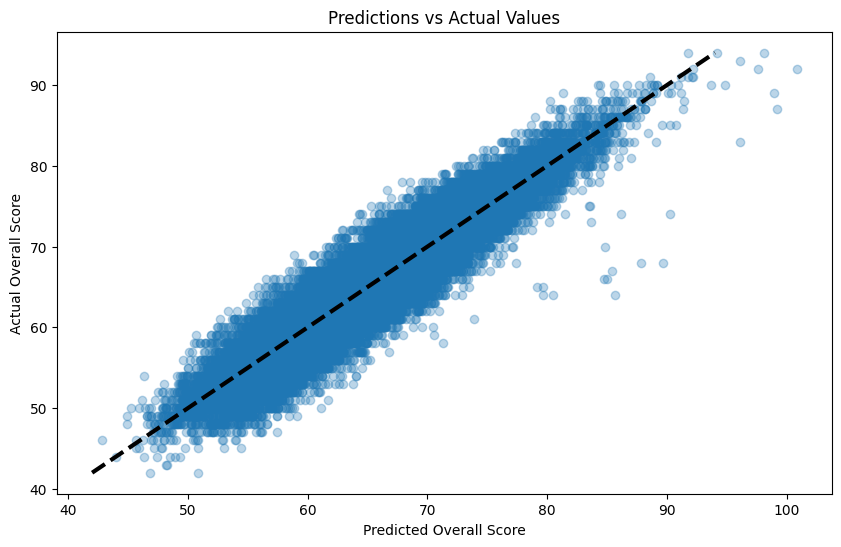

In [46]:
import matplotlib.pyplot as plt
# Collecting predictions and actual values
predicted_vs_actual = predictions.select("prediction", "overall").toPandas()


plt.figure(figsize=(10, 6))
plt.scatter(predicted_vs_actual['prediction'], predicted_vs_actual['overall'], alpha=0.3)
plt.title('Predictions vs Actual Values')
plt.xlabel('Predicted Overall Score')
plt.ylabel('Actual Overall Score')
plt.plot([predicted_vs_actual['overall'].min(), predicted_vs_actual['overall'].max()], 
         [predicted_vs_actual['overall'].min(), predicted_vs_actual['overall'].max()], 'k--', lw=3)
plt.show()

## Tuning

In [39]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LinearRegression(featuresCol='features', labelCol='overall')

lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.001, 0.01, 1.0])
                .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
                .addGrid(lr.maxIter, [25, 100, 250])
                .addGrid(lr.solver, ['auto', 'normal', 'l-bfgs'])
                .build())

evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")

lr_crossval = CrossValidator(estimator=lr,
                                estimatorParamMaps=lr_paramGrid,
                                evaluator=evaluator,
                                numFolds=5)

lr_cvModel = lr_crossval.fit(train)

lr_bestModel = lr_cvModel.bestModel

cv_train_pred = lr_bestModel.transform(train)
cv_train_rmse = evaluator.evaluate(cv_train_pred)

cv_test_pred = lr_bestModel.transform(test)
cv_test_rmse = evaluator.evaluate(cv_test_pred)

print(f"Best Model Train RMSE: {cv_train_rmse}")
print(f"Best Model Test RMSE: {cv_test_rmse}")

Best Model Train RMSE: 2.5999594352639237
Best Model Test RMSE: 2.582785976883365


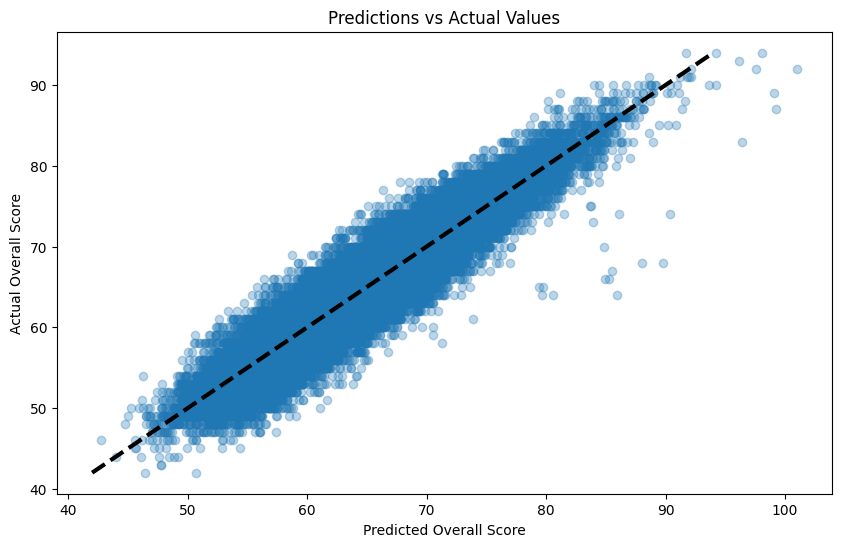

In [40]:
import matplotlib.pyplot as plt
# Collecting predictions and actual values
predicted_vs_actual = cv_test_pred.select("prediction", "overall").toPandas()


plt.figure(figsize=(10, 6))
plt.scatter(predicted_vs_actual['prediction'], predicted_vs_actual['overall'], alpha=0.3)
plt.title('Predictions vs Actual Values')
plt.xlabel('Predicted Overall Score')
plt.ylabel('Actual Overall Score')
plt.plot([predicted_vs_actual['overall'].min(), predicted_vs_actual['overall'].max()], 
         [predicted_vs_actual['overall'].min(), predicted_vs_actual['overall'].max()], 'k--', lw=3)
plt.show()

In [41]:
lr_bestModel.extractParamMap()

{Param(parent='LinearRegression_5b3cec1c2a2f', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LinearRegression_5b3cec1c2a2f', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0,
 Param(parent='LinearRegression_5b3cec1c2a2f', name='epsilon', doc='The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber'): 1.35,
 Param(parent='LinearRegression_5b3cec1c2a2f', name='featuresCol', doc='features column name.'): 'features',
 Param(parent='LinearRegression_5b3cec1c2a2f', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LinearRegression_5b3cec1c2a2f', name='labelCol', doc='label column name.'): 'overall',
 Param(parent='LinearRegression_5b3cec1c2a2f', name='loss', doc='The loss function to be optimized. Supported options: squaredError, huber.'): 'squaredErr

## Second Model Tuning

In [51]:
# Now we will do random forest regression
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol='features', labelCol='overall')

rf_model = rf.fit(train)

train_pred = rf_model.transform(train)
test_pred = rf_model.transform(test)

evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")

train_rmse = evaluator.evaluate(train_pred)
test_rmse = evaluator.evaluate(test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 2.384944496708145
Test RMSE: 2.372689397307423


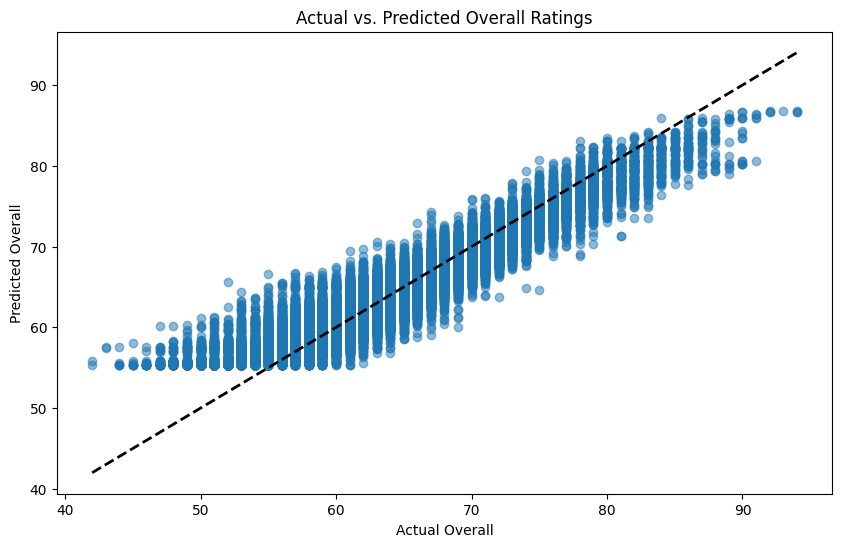

In [52]:
predictions_pd = test_pred.select('overall', 'prediction').toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['overall'], predictions_pd['prediction'], alpha=0.5)
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.title('Actual vs. Predicted Overall Ratings')
plt.plot([predictions_pd['overall'].min(), predictions_pd['overall'].max()], 
         [predictions_pd['overall'].min(), predictions_pd['overall'].max()], 
         'k--', lw=2)  # Diagonal line for reference
plt.show()


In [53]:
df_assembled_truncated = df_assembled.sample(False, 0.1, seed=504)
train_reduced, test_reduced = df_assembled.randomSplit([0.7, 0.3], seed=504)

In [54]:
rf = RandomForestRegressor(featuresCol='features', labelCol='overall')

# Define a parameter grid to search over
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [25, 35])
             .addGrid(rf.maxDepth, [8, 10])
             .build())

# Define the evaluator
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="overall", metricName="rmse")

# Setup CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)
print('Stage 0: Completed!')
# Fit the model
cvModel = cv.fit(train_reduced)
print('Stage 1: Completed!')
bestmodel = cvModel.bestModel
# Make predictions and evaluate
test_pred = bestmodel.transform(test_reduced)
train_pred = bestmodel.transform(train_reduced)
train_rmse = evaluator.evaluate(train_pred)
test_rmse = evaluator.evaluate(test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Stage 0: Completed!
Stage 1: Completed!
Train RMSE: 1.4660469690092592
Test RMSE: 1.5137746484031664


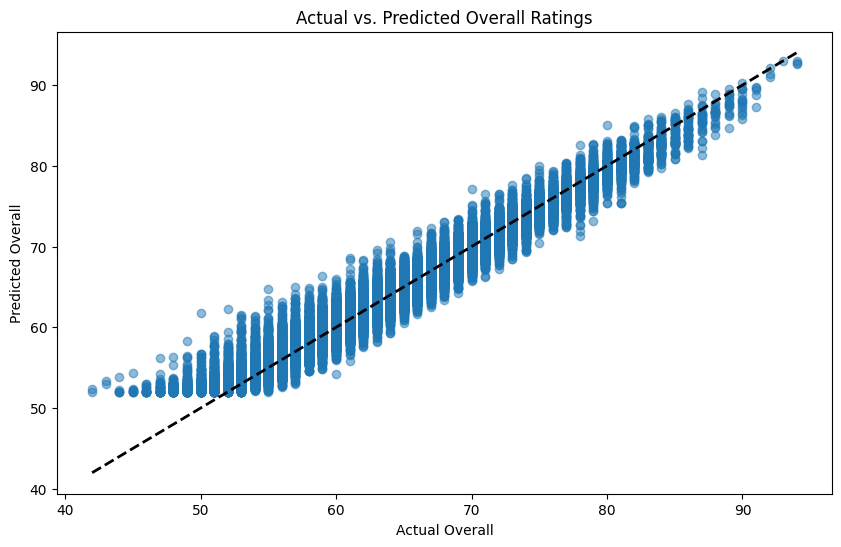

In [57]:
predictions_pd = test_pred.select('overall', 'prediction').toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['overall'], predictions_pd['prediction'], alpha=0.5)
plt.xlabel('Actual Overall')
plt.ylabel('Predicted Overall')
plt.title('Actual vs. Predicted Overall Ratings')
plt.plot([predictions_pd['overall'].min(), predictions_pd['overall'].max()], 
         [predictions_pd['overall'].min(), predictions_pd['overall'].max()], 
         'k--', lw=2)  # Diagonal line for reference
plt.show()

In [56]:
# Show best model summary
bestmodel.extractParamMap()


{Param(parent='RandomForestRegressor_c629db3b0fb8', name='bootstrap', doc='Whether bootstrap samples are used when building trees.'): True,
 Param(parent='RandomForestRegressor_c629db3b0fb8', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False,
 Param(parent='RandomForestRegressor_c629db3b0fb8', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10,
 Param(parent='RandomForestRegressor_c629db3b0fb8', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supporte

In [69]:
bestmodel.featureImportances

# Compute the list of feature importance
feature_importance = [(col, val) for col, val in zip(feature_cols, bestmodel.featureImportances)]

# Sort the list of feature importance in descending order
feature_importance.sort(key=lambda x: __builtins__.abs(x[1]))
feature_importance.reverse()

# Print the feature importance
drop_col = []
for feature, importance in feature_importance:
    if importance < 0.01:
        drop_col.append(feature)

print(f"Features with importance less than 0.01: {(drop_col)}")

Features with importance less than 0.01: ['passing', 'physic', 'attacking_crossing', 'defending_sliding_tackle', 'attacking_finishing', 'power_shot_power', 'pace', 'power_strength', 'power_stamina', 'movement_sprint_speed', 'goalkeeping_kicking', 'mentality_vision', 'mentality_aggression', 'movement_acceleration', 'attacking_volleys', 'power_jumping', 'weight_kg', 'height_cm', 'movement_agility', 'mentality_penalties', 'skill_moves', 'movement_balance', 'skill_fk_accuracy', 'league_level', 'weak_foot', 'work_rate_vec', 'preferred_foot_vec', 'body_type_vec', 'is_gk']


In [ ]:
feature_cols = [col for col in feature_cols if col not in drop_col]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

df_assembled = vector_assembler.transform(df_corr_analyzed)

train, test = df_assembled.randomSplit([0.7, 0.3], seed=504)

In [71]:
lr = LinearRegression(featuresCol='features', labelCol='overall', regParam = 0.001, maxIter =250, solver = 'l-bfgs')

# Train the model
lr_model = lr.fit(train)

# Make predictions
predictions = lr_model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")
mse = evaluator.evaluate(predictions)
train_pred = lr_model.transform(train)
train_mse = evaluator.evaluate(train_pred)
print(f"(RMSE) on train data = {train_mse}")
print(f"(RMSE) on test data = {mse}")

(RMSE) on train data = 2.5999594352639237
(RMSE) on test data = 2.582785976883365


In [72]:
# Now we will do random forest regression
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol='features', labelCol='overall', numTrees=35, maxDepth=10, maxBins=48)

rf_model = rf.fit(train)

train_pred = rf_model.transform(train)
test_pred = rf_model.transform(test)

evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")

train_rmse = evaluator.evaluate(train_pred)
test_rmse = evaluator.evaluate(test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 1.4353242625474403
Test RMSE: 1.4775300500027055


### We can see that feature selection has slight improvement on random forest model but nearly nothing with linear regression model